In [3]:
#Imports
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import tree
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

import seaborn as sns

In [5]:
#Reading data
#data = pd.read_csv("language_data.csv")
data = pd.read_csv('data/cleaned/language_data.csv')
data.head(10)

,wals_code,iso_code,glottocode,Name,latitude,longitude,genus,family,macroarea,countrycodes,...,58B Number of Possessive Nouns_2 One,58B Number of Possessive Nouns_3 Two to four,58B Number of Possessive Nouns_4 Five or more,58B Number of Possessive Nouns_nan,79B Suppletion in Imperatives and Hortatives_1 A regular and a suppletive form alternate,79B Suppletion in Imperatives and Hortatives_2 Imperative,79B Suppletion in Imperatives and Hortatives_3 Hortative,79B Suppletion in Imperatives and Hortatives_4 Imperative and Hortative,79B Suppletion in Imperatives and Hortatives_5 None (= no suppletive imperatives reported in the reference material),79B Suppletion in Imperatives and Hortatives_nan
0,aab,NaN,NaN,Arapesh (Abu),-3.450000,142.950000,Kombio-Arapesh,Torricelli,NaN,PG,...,0,0,0,1,0,0,0,0,0,1
1,aar,aiw,aari1239,Aari,6.000000,36.583333,South Omotic,Afro-Asiatic,Africa,ET,...,0,0,0,1,0,0,0,0,0,1
2,aba,aau,abau1245,Abau,-4.000000,141.250000,Upper Sepik,Sepik,Papunesia,PG,...,0,0,0,1,0,0,0,0,0,1
3,abb,shu,chad1249,Arabic (Chadian),13.833333,20.833333,Semitic,Afro-Asiatic,Africa,TD,...,0,0,0,1,0,0,0,0,0,1
4,abd,abi,abid1235,Abidji,5.666667,-4.583333,Kwa,Niger-Congo,Africa,CI,...,0,0,0,1,0,0,0,0,0,1
5,abe,apc,nort3139,Arabic (Beirut),33.916667,35.500000,Semitic,Afro-Asiatic,Eurasia,LB,...,0,0,0,1,0,0,0,0,0,1
6,abh,abv,baha1259,Arabic (Bahrain),26.000000,50.500000,Semitic,Afro-Asiatic,Eurasia,BH,...,0,0,0,1,0,0,0,0,0,1
7,abi,axb,abip1241,Abipón,-29.000000,-61.000000,South Guaicuruan,Guaicuruan,South America,AR,...,0,0,0,1,0,0,0,0,0,1
8,abk,abk,abkh1244,Abkhaz,43.083333,41.000000,Northwest Caucasian,Northwest Caucasian,Eurasia,GE,...,0,0,0,0,0,0,0,0,1,0
9,abm,akz,alab1237,Alabama,32.333333,-87.416667,Muskogean,Muskogean,North America,US,...,0,0,0,1,0,0,0,0,0,1


In [7]:
largest_families = ['Sino-Tibetan',
                  'Trans-New Guinea',
                  'Indo-European',
                  'Niger-Congo',
                  'Austronesian',
                  'Afro-Asiatic'] 

data_families = data.loc[data['family'].isin(largest_families)]

In [9]:
features = data.iloc[:,range(267,1597)]
features.describe()

,1A Consonant Inventories_2 Moderately small,1A Consonant Inventories_3 Average,1A Consonant Inventories_4 Moderately large,1A Consonant Inventories_5 Large,1A Consonant Inventories_nan,2A Vowel Quality Inventories_1 Small (2-4),2A Vowel Quality Inventories_2 Average (5-6),2A Vowel Quality Inventories_3 Large (7-14),2A Vowel Quality Inventories_nan,3A Consonant-Vowel Ratio_1 Low,...,58B Number of Possessive Nouns_2 One,58B Number of Possessive Nouns_3 Two to four,58B Number of Possessive Nouns_4 Five or more,58B Number of Possessive Nouns_nan,79B Suppletion in Imperatives and Hortatives_1 A regular and a suppletive form alternate,79B Suppletion in Imperatives and Hortatives_2 Imperative,79B Suppletion in Imperatives and Hortatives_3 Hortative,79B Suppletion in Imperatives and Hortatives_4 Imperative and Hortative,79B Suppletion in Imperatives and Hortatives_5 None (= no suppletive imperatives reported in the reference material),79B Suppletion in Imperatives and Hortatives_nan
count,2679.000000,2679.000000,2679.000000,2679.000000,2679.000000,2679.000000,2679.000000,2679.000000,2679.000000,2679.000000,...,2679.000000,2679.000000,2679.000000,2679.000000,2679.000000,2679.000000,2679.000000,2679.000000,2679.000000,2679.000000
mean,0.045539,0.075028,0.035088,0.021277,0.789847,0.034714,0.107130,0.068682,0.789474,0.021650,...,0.001120,0.001493,0.001120,0.909295,0.002986,0.010825,0.000747,0.000373,0.057111,0.927958
std,0.208523,0.263486,0.184036,0.144332,0.407493,0.183090,0.309336,0.252960,0.407759,0.145565,...,0.033451,0.038619,0.033451,0.287243,0.054575,0.103498,0.027318,0.019320,0.232098,0.258605
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
#Let's save the feature names

feature_names = features.columns.to_list()

In [31]:
#As we increase max depth, how does the accuracy of the classifier chance? Let's start with Indo-European.

for i in np.arange(1,10):
    decisionTree = tree.DecisionTreeClassifier(max_depth=i)
    decisionTree = decisionTree.fit(features, data['Indo-European'])
    y_pred = decisionTree.predict(features)
    print("max depth: ",i," accuracy: ",metrics.accuracy_score(y_true = data['Indo-European'], y_pred = y_pred))

max depth:  1  accuracy:  0.9384098544232923
max depth:  2  accuracy:  0.9466218738335199
max depth:  3  accuracy:  0.948488241881299
max depth:  4  accuracy:  0.9533407988055245
max depth:  5  accuracy:  0.9567002612915267
max depth:  6  accuracy:  0.9600597237775289
max depth:  7  accuracy:  0.9615528182157521
max depth:  8  accuracy:  0.9637924598730869
max depth:  9  accuracy:  0.9649122807017544


In [33]:
#Now let's make a decision tree, starting again with Indo-European using a max depth of 3

decisionTree = tree.DecisionTreeClassifier(max_depth=5)

decisionTree = decisionTree.fit(features, data['Indo-European'])

y_pred = decisionTree.predict(features)

print(metrics.accuracy_score(y_true = data['Indo-European'], y_pred = y_pred))

#Printing the tree
print(tree.export_text(decisionTree, feature_names = feature_names))

misclassified = []
#Printing which languages were misclassified
for i in np.arange(len(features)):
    a = decisionTree.predict(features)[i]
    language_name = data['Name'].to_list()[i]
    True_value = data['Indo-European'].to_list()[i]
    True_data = data.loc[data['Name'] == language_name][['Name','family','countrycodes','genus','macroarea']]
    if True_value != a:
        print("misclassified:",language_name, "\n   true family: ", True_data['family'].to_string(index=False))
    #if True_value == a:
        #print("correctly classified:",language_name)
        misclassified.append(language_name)

0.9567002612915267
|--- 53A Ordinal Numerals_7 First, second, three-th <= 0.50
|   |--- 54A Distributive Numerals_5 Marked by preceding word <= 0.50
|   |   |--- 54A Distributive Numerals_1 No distributive numerals <= 0.50
|   |   |   |--- 138A Tea_1 Words derived from Sinitic cha <= 0.50
|   |   |   |   |--- 90C Postnominal relative clauses_4 NRel or correlative <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- 90C Postnominal relative clauses_4 NRel or correlative >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- 138A Tea_1 Words derived from Sinitic cha >  0.50
|   |   |   |   |--- 57A Position of Pronominal Possessive Affixes_nan <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- 57A Position of Pronominal Possessive Affixes_nan >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- 54A Distributive Numerals_1 No distributive numerals >  0.50
|   |   |   |--- 55A Numeral Classifiers_nan <= 0.50
|   |   |   |   |--- 117A Predicative Possession_5 'Ha

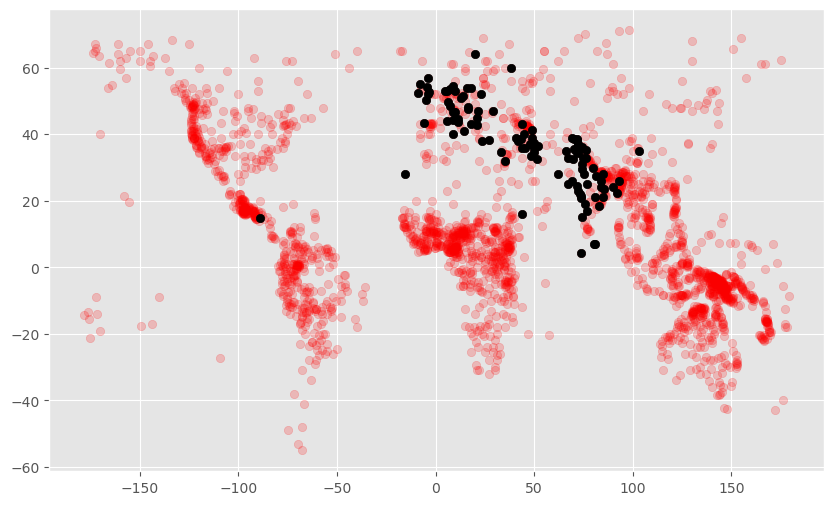

In [132]:
#That is quite a lot of languages, almost all Indo-European. Let's plot them on a map.

misclassified_dataset = data.loc[data['Name'].isin(misclassified)]

plt.scatter(data['longitude'],data['latitude'],c='r',alpha=0.2)
plt.scatter(misclassified_dataset['longitude'],misclassified_dataset['latitude'],c='black')
plt.show()

In [142]:
print('number of indo-european classified otherwise:',len(misclassified_dataset.loc[misclassified_dataset['family'] == "Indo-European"]))
print('number of non-indo-european classified as indo-european:',len(misclassified_dataset.loc[misclassified_dataset['family'] != "Indo-European"]))
print(misclassified_dataset.loc[misclassified_dataset['family'] != "Indo-European"].Name.to_list())

number of indo-european classified otherwise: 113
number of non-indo-european classified as indo-european: 3
["Arabic (San'ani)", 'Chortí', 'Salar']


**Cross Validation**

At this point, I think it is best to start doing cross-validation with our trees. I start with one train-test split and test a decision tree for Indo-European with max depth of 1 and min sample split of 2. After that, I define functions to more easily guage the skill of different tree models.

In [30]:
#Now let's do some proper cross validation

X = data[feature_names].values
y = data['Indo-European'].values


Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, random_state=1, test_size=0.8)

decisionTree = tree.DecisionTreeClassifier(max_depth=5)

decisionTree = decisionTree.fit(Xtrain, Ytrain)

y_pred = decisionTree.predict(Xtest)

print(metrics.accuracy_score(y_true = Ytest, y_pred = y_pred))
print(metrics.confusion_matrix(y_true = Ytest, y_pred = y_pred))
print()

0.9347014925373134
[[1961   41]
 [  99   43]]


In [26]:
def language_tree_accuracy(family,max_depth=1,min_samples_split=2):
    X = data[feature_names].values
    y = data[family].values

    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, random_state=1, test_size=0.8)
    decisionTree = tree.DecisionTreeClassifier(max_depth=max_depth,min_samples_split=min_samples_split)
    decisionTree = decisionTree.fit(Xtrain, Ytrain)
    y_pred_test = decisionTree.predict(Xtest)
    y_pred_train = decisionTree.predict(Xtrain)
    result = [metrics.accuracy_score(y_true = Ytrain, y_pred = y_pred_train), metrics.accuracy_score(y_true = Ytest, y_pred = y_pred_test)]
    return result

In [32]:
#the best model here has max depth 7 and min sample split 3

print("Training Accuracy,","Test Accuracy")
for i in np.arange(2,10):
    for j in np.arange(2,10):
        accuracy = language_tree_accuracy('Indo-European',i,j)
        print(accuracy,"Max Depth: ", i, "Min Sample Split: ", j)

Training Accuracy, Test Accuracy
[0.9532710280373832, 0.9407649253731343] Max Depth:  2 Min Sample Split:  2
[0.9532710280373832, 0.9407649253731343] Max Depth:  2 Min Sample Split:  3
[0.9532710280373832, 0.9407649253731343] Max Depth:  2 Min Sample Split:  4
[0.9532710280373832, 0.9407649253731343] Max Depth:  2 Min Sample Split:  5
[0.9532710280373832, 0.9407649253731343] Max Depth:  2 Min Sample Split:  6
[0.9532710280373832, 0.9407649253731343] Max Depth:  2 Min Sample Split:  7
[0.9532710280373832, 0.9407649253731343] Max Depth:  2 Min Sample Split:  8
[0.9495327102803738, 0.9407649253731343] Max Depth:  2 Min Sample Split:  9
[0.9570093457943926, 0.9267723880597015] Max Depth:  3 Min Sample Split:  2
[0.9570093457943926, 0.9267723880597015] Max Depth:  3 Min Sample Split:  3
[0.9570093457943926, 0.9267723880597015] Max Depth:  3 Min Sample Split:  4
[0.9570093457943926, 0.9267723880597015] Max Depth:  3 Min Sample Split:  5
[0.9570093457943926, 0.9267723880597015] Max Depth:  3 

In [40]:
#Let's get a breakdown of the tree

def language_tree(family,max_depth=1,min_samples_split=2):
    X = data[feature_names].values
    y = data[family].values

    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, random_state=1, test_size=0.8)
    decisionTree = tree.DecisionTreeClassifier(max_depth=max_depth,min_samples_split=min_samples_split)
    decisionTree = decisionTree.fit(Xtrain, Ytrain)
    y_pred_test = decisionTree.predict(Xtest)
    y_pred_train = decisionTree.predict(Xtrain)
    result = tree.export_text(decisionTree, feature_names = feature_names)
    print(result)

language_tree('Indo-European',7,3)

|--- 53A Ordinal Numerals_7 First, second, three-th <= 0.50
|   |--- 54A Distributive Numerals_5 Marked by preceding word <= 0.50
|   |   |--- 54A Distributive Numerals_1 No distributive numerals <= 0.50
|   |   |   |--- 46A Indefinite Pronouns_3 Special <= 0.50
|   |   |   |   |--- 138A Tea_1 Words derived from Sinitic cha <= 0.50
|   |   |   |   |   |--- 55A Numeral Classifiers_2 Optional <= 0.50
|   |   |   |   |   |   |--- 116A Polar Questions_4 Interrogative word order <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- 116A Polar Questions_4 Interrogative word order >  0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- 55A Numeral Classifiers_2 Optional >  0.50
|   |   |   |   |   |   |--- 64A Nominal and Verbal Conjunction_1 Identity <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- 64A Nominal and Verbal Conjunction_1 Identity >  0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- 138A 

In [58]:
#Exploring some other trees

print("Sino-Tibetan:",np.mean(language_tree_accuracy("Sino-Tibetan",3)))
print(language_tree("Sino-Tibetan",3))


print("Trans-New Guinea:",np.mean(language_tree_accuracy("Trans-New Guinea",3)))
print(language_tree("Trans-New Guinea",3))


print("Austronesian:",np.mean(language_tree_accuracy("Austronesian",3)))
print(language_tree("Austronesian",3))

Sino-Tibetan: 0.9533303110615148
|--- 90B Prenominal relative clauses_nan <= 0.50
|   |--- 88A Order of Demonstrative and Noun_2 Noun-Demonstrative <= 0.50
|   |   |--- 85A Order of Adposition and Noun Phrase_nan <= 0.50
|   |   |   |--- class: 0
|   |   |--- 85A Order of Adposition and Noun Phrase_nan >  0.50
|   |   |   |--- class: 1
|   |--- 88A Order of Demonstrative and Noun_2 Noun-Demonstrative >  0.50
|   |   |--- class: 1
|--- 90B Prenominal relative clauses_nan >  0.50
|   |--- 144R SONegV Order_2 Prefix&NoDoubleNeg <= 0.50
|   |   |--- 81A Order of Subject, Object and Verb_1 SOV <= 0.50
|   |   |   |--- class: 0
|   |   |--- 81A Order of Subject, Object and Verb_1 SOV >  0.50
|   |   |   |--- class: 0
|   |--- 144R SONegV Order_2 Prefix&NoDoubleNeg >  0.50
|   |   |--- 51A Position of Case Affixes_6 Postpositional clitics <= 0.50
|   |   |   |--- class: 0
|   |   |--- 51A Position of Case Affixes_6 Postpositional clitics >  0.50
|   |   |   |--- class: 1

None
Trans-New Guine

With further exploration we find some language families are harder to classify than others. 

After this, I would like to return to phonology. Suppose you wake up somewhere unknown and you hear the locals speaking a strange language. You might not know what they are saying, but you can hear the sounds they are using. Is that enough to predict their language?

We could also investigate regression to latitude from features. Is it easier to predict family or geographic location? Is there any correlation to latitude? Or we could study what makes some language families harder to classify with the decision tree.